In [637]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, Binarizer


In [638]:
dev = pd.read_csv('output/loan_dev.csv')
comp = pd.read_csv('output/loan_comp.csv')
all = pd.read_csv('output/loan.csv')

list(dev.columns)


['Id',
 'loan_date',
 'loan_duration',
 'loan_payments',
 'Predicted',
 'account_frequency',
 'account_district_region',
 'account_district_no_inhabitants',
 'account_district_no_municipalities_0_499',
 'account_district_no_municipalities_500_1999',
 'account_district_no_municipalities_2000_9999',
 'account_district_no_municipalities_10000_plus',
 'account_district_no_cities',
 'account_district_ratio_urban_inhabitants',
 'account_district_average_salary',
 'account_district_unemployment_rate_95',
 'account_district_unemployment_rate_96',
 'account_district_no_enterpreneurs_per_1000_inhabitants',
 'account_district_no_crimes_95',
 'account_district_no_crimes_96',
 'owner_card_type',
 'owner_district_region',
 'owner_district_no_inhabitants',
 'owner_district_no_municipalities_0_499',
 'owner_district_no_municipalities_500_1999',
 'owner_district_no_municipalities_2000_9999',
 'owner_district_no_municipalities_10000_plus',
 'owner_district_no_cities',
 'owner_district_ratio_urban_inhabi

# Transformation Utils

In [639]:
def show_hist(columns, trend=True):
    for column in columns:
        sns.histplot(dev[column], kde=trend)
        plt.show()


def transform(columns, scaler):
    scaler = scaler.fit(dev[columns])
    dev[columns] = scaler.transform(dev[columns])
    comp[columns] = scaler.transform(comp[columns])
    all[columns] = scaler.transform(all[columns])



# Account & Owner
#### (most dists are exactly the same)

In [640]:
[col for col in dev if col.startswith('account') or col.startswith('owner')]


['account_frequency',
 'account_district_region',
 'account_district_no_inhabitants',
 'account_district_no_municipalities_0_499',
 'account_district_no_municipalities_500_1999',
 'account_district_no_municipalities_2000_9999',
 'account_district_no_municipalities_10000_plus',
 'account_district_no_cities',
 'account_district_ratio_urban_inhabitants',
 'account_district_average_salary',
 'account_district_unemployment_rate_95',
 'account_district_unemployment_rate_96',
 'account_district_no_enterpreneurs_per_1000_inhabitants',
 'account_district_no_crimes_95',
 'account_district_no_crimes_96',
 'owner_card_type',
 'owner_district_region',
 'owner_district_no_inhabitants',
 'owner_district_no_municipalities_0_499',
 'owner_district_no_municipalities_500_1999',
 'owner_district_no_municipalities_2000_9999',
 'owner_district_no_municipalities_10000_plus',
 'owner_district_no_cities',
 'owner_district_ratio_urban_inhabitants',
 'owner_district_average_salary',
 'owner_district_unemployment

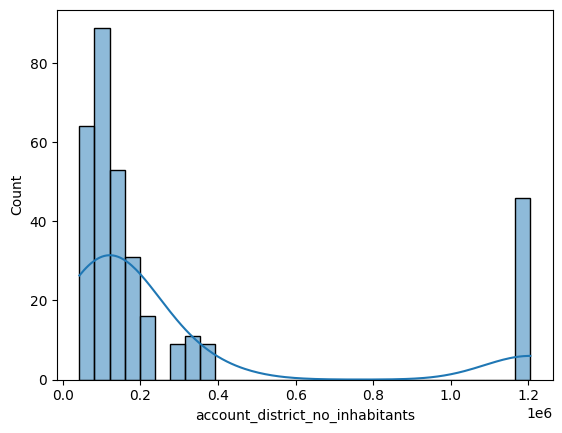

In [641]:
log_attrs = ['_district_no_inhabitants']


show_hist(['account' + attr for attr in log_attrs])


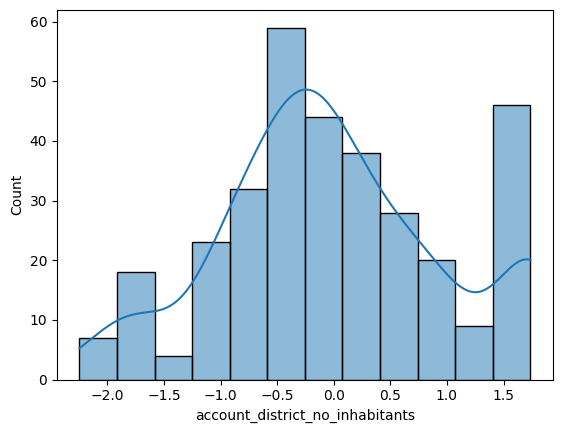

In [642]:
log_cols = [subject + attr for subject in ['account', 'owner']
            for attr in log_attrs]

transform(log_cols, PowerTransformer())

show_hist(['account' + attr for attr in log_attrs])


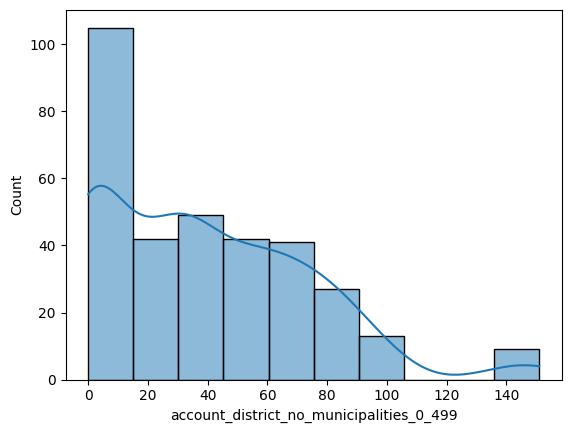

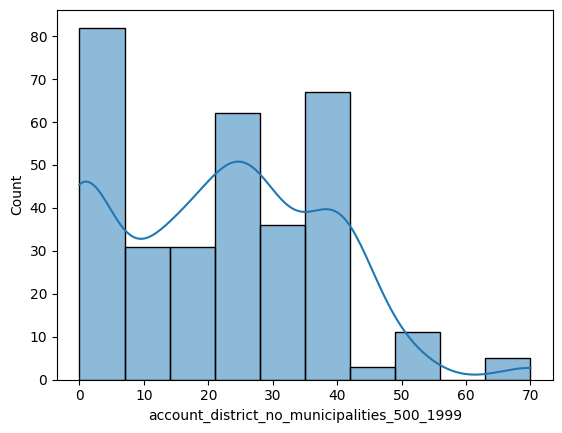

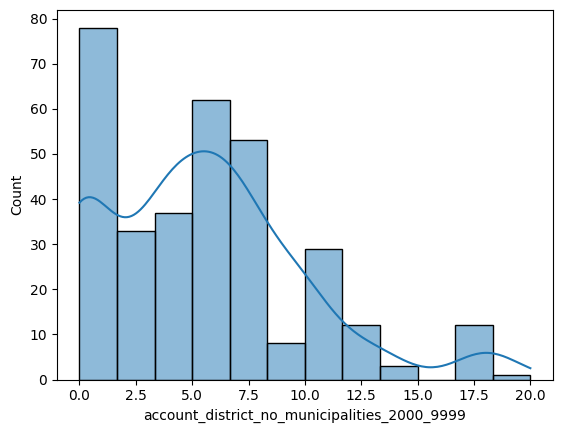

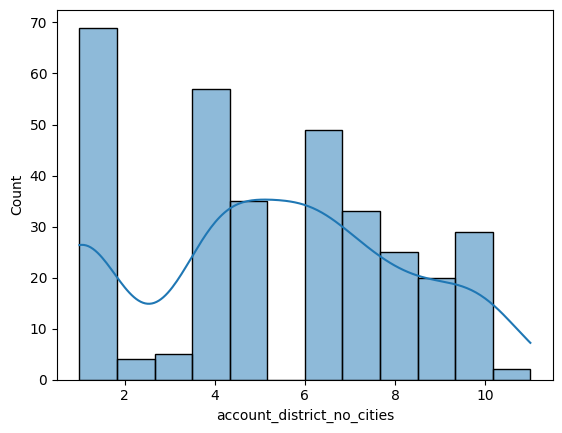

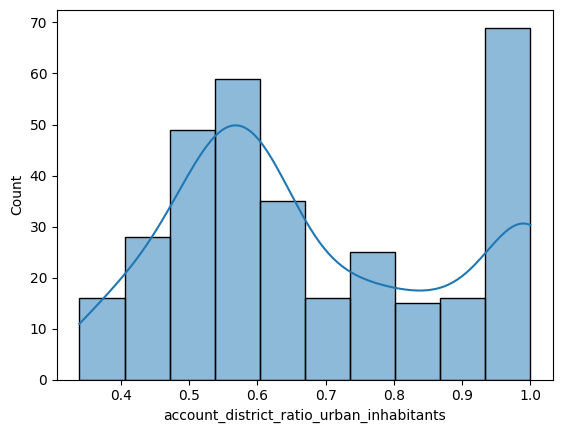

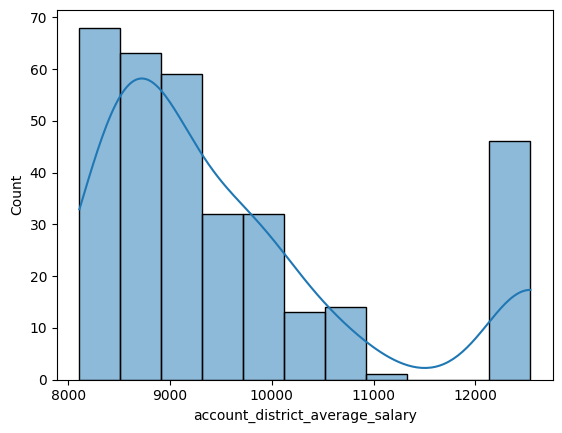

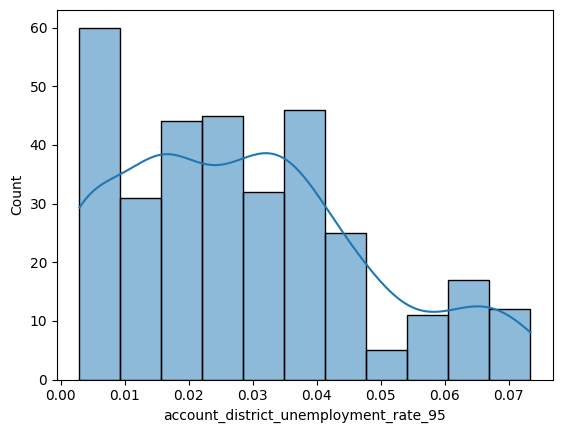

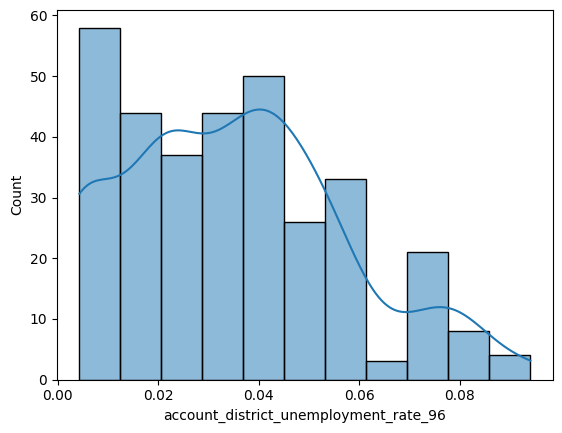

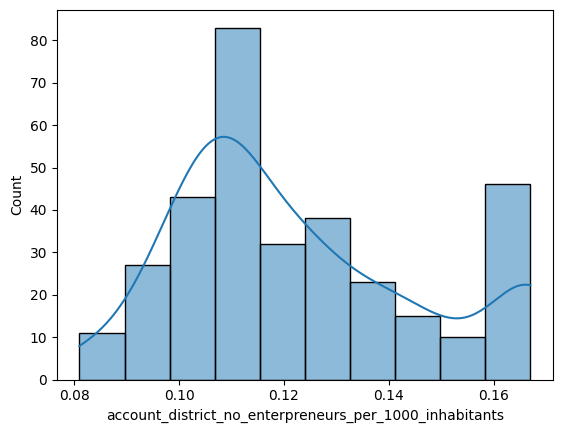

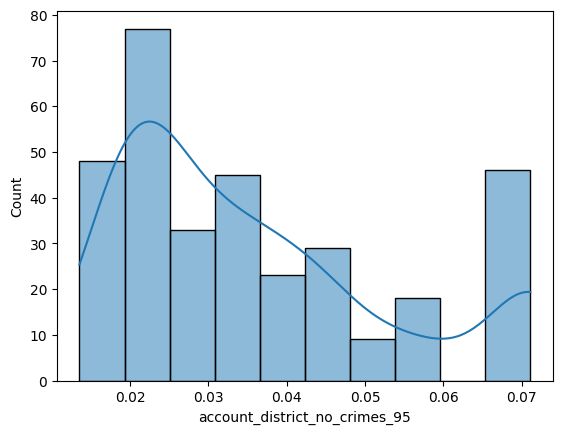

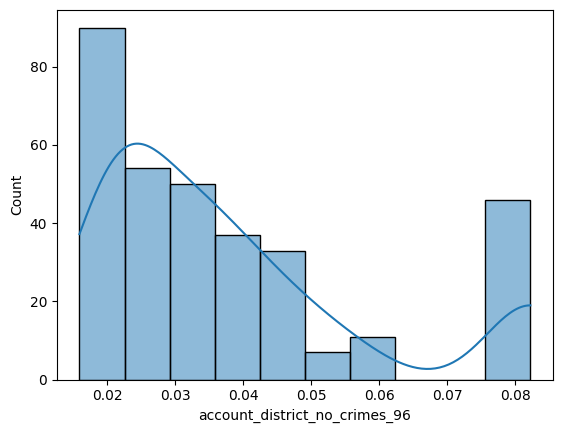

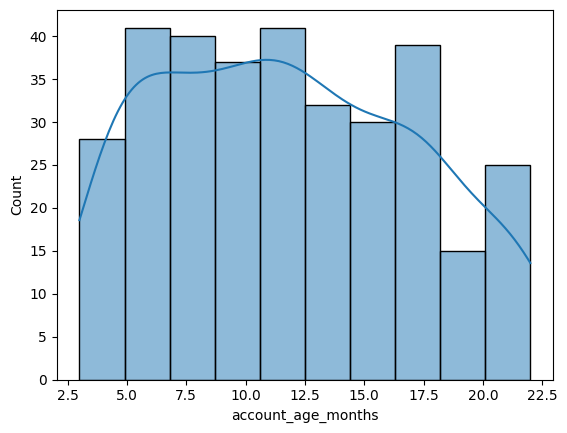

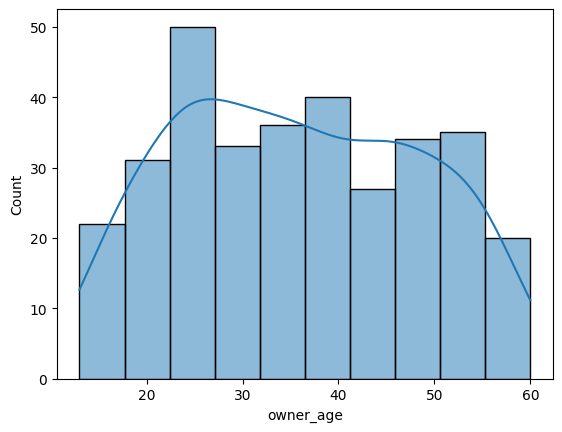

In [643]:
norm_attrs = ['_district_no_municipalities_0_499',
              '_district_no_municipalities_500_1999', '_district_no_municipalities_2000_9999', '_district_no_cities', '_district_ratio_urban_inhabitants', '_district_average_salary',
              '_district_unemployment_rate_95', '_district_unemployment_rate_96', '_district_no_enterpreneurs_per_1000_inhabitants', '_district_no_crimes_95', '_district_no_crimes_96']

# '_age_months' only occurs on account
show_hist(['account' + attr for attr in norm_attrs] +
          ['account_age_months', 'owner_age'])


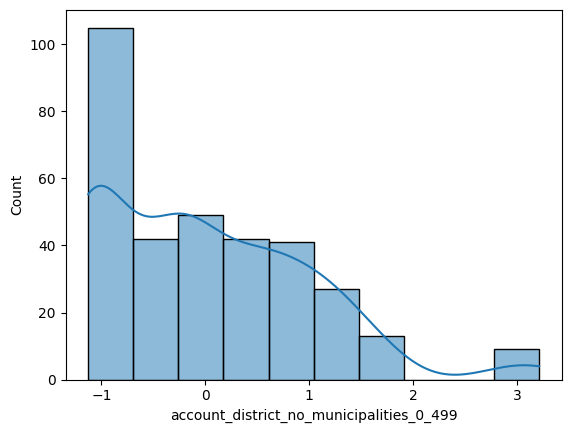

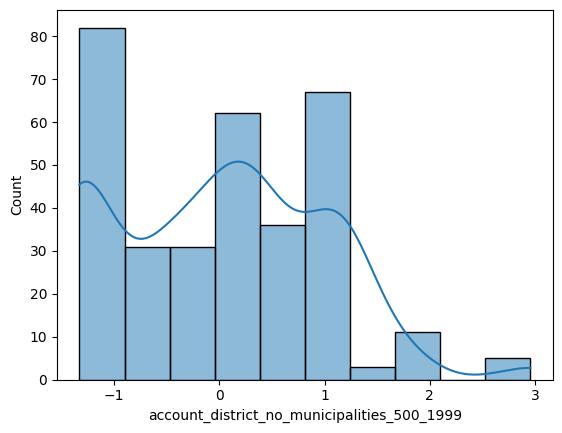

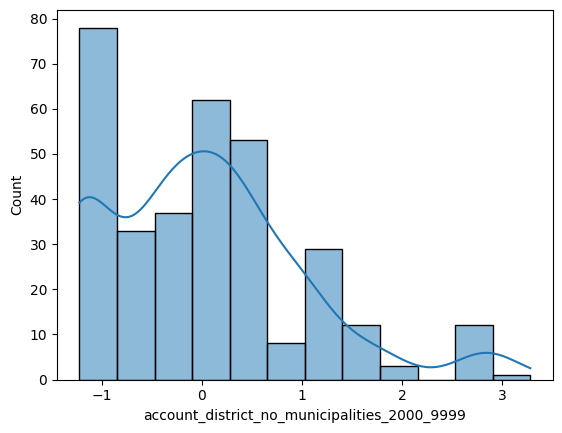

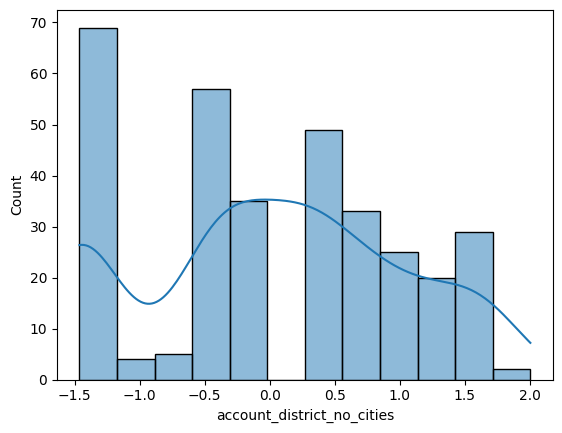

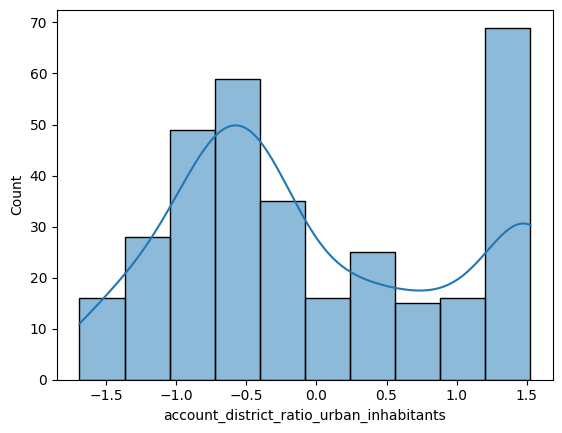

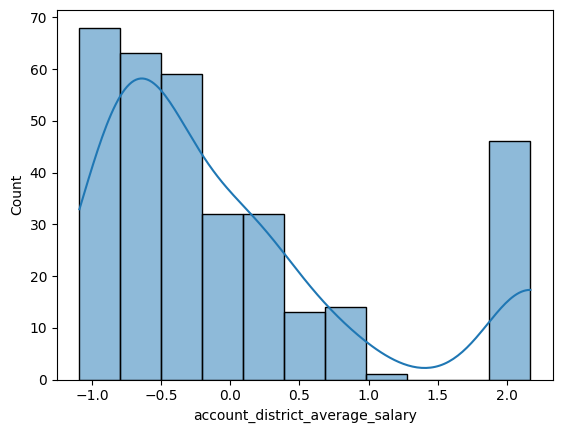

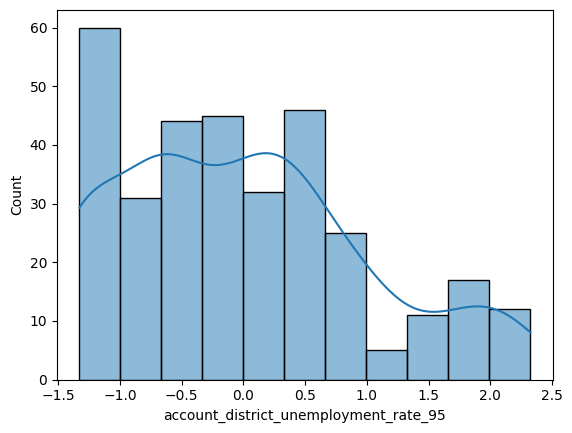

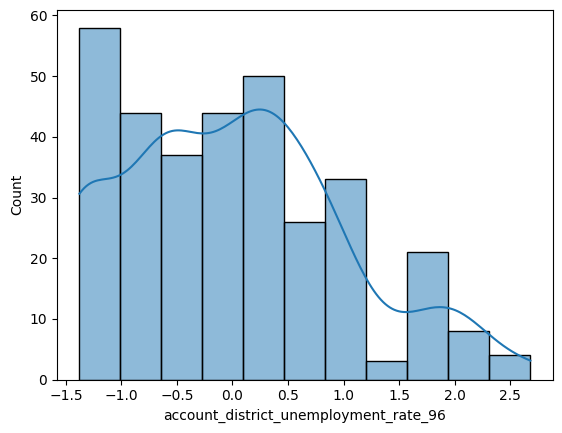

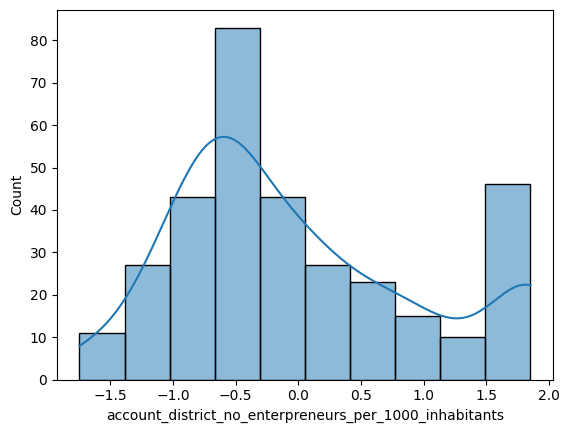

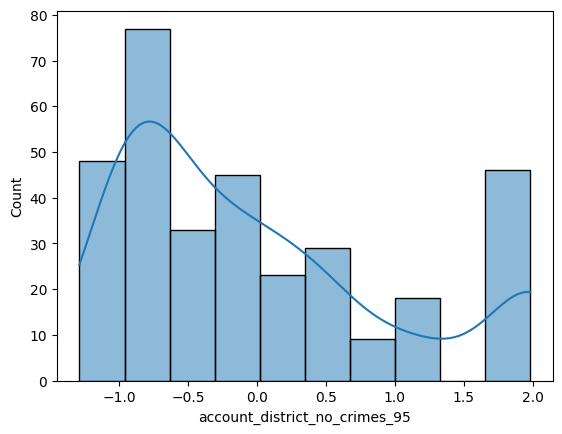

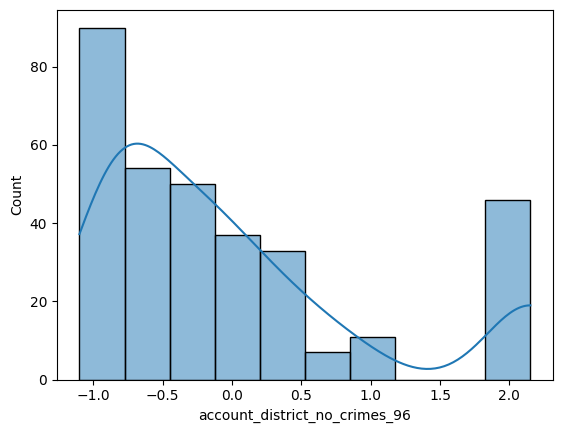

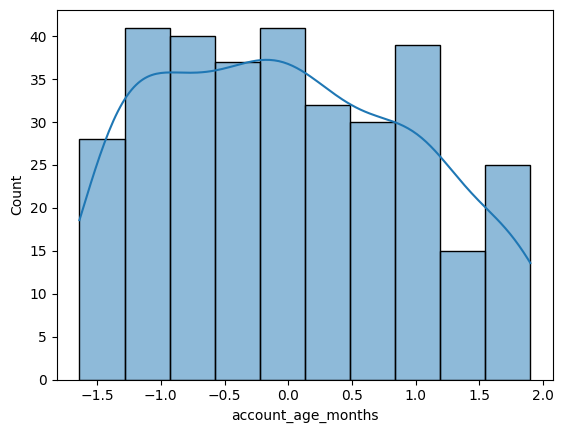

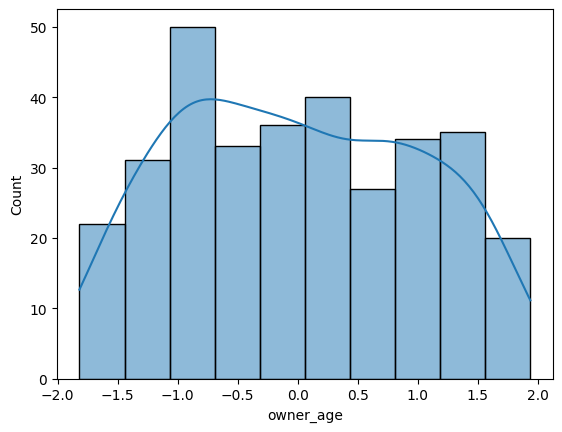

In [644]:
norm_cols = [subject + attr for subject in ['account', 'owner']
             for attr in norm_attrs]

norm_cols.append('account_age_months')
norm_cols.append('owner_age')

transform(norm_cols, StandardScaler())

show_hist(['account' + attr for attr in norm_attrs] +
          ['account_age_months', 'owner_age'])


# Transactions

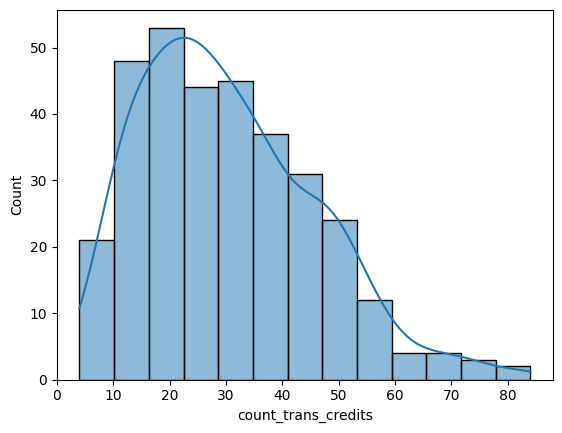

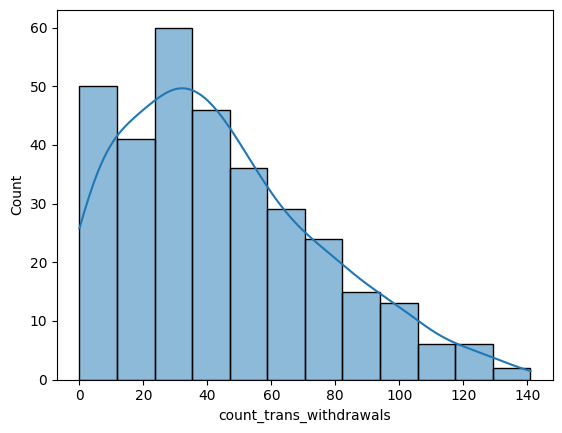

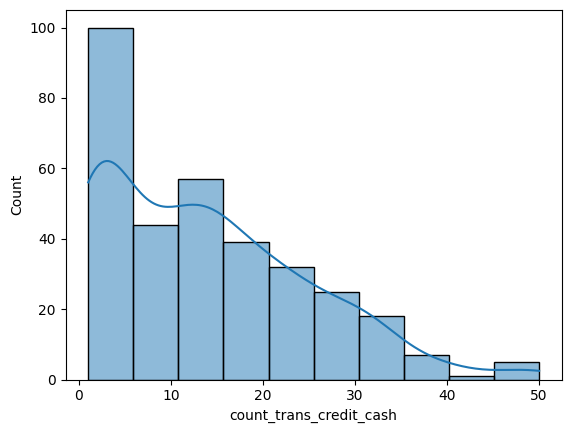

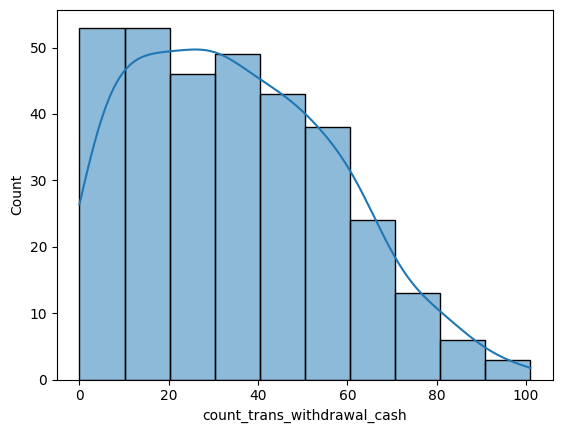

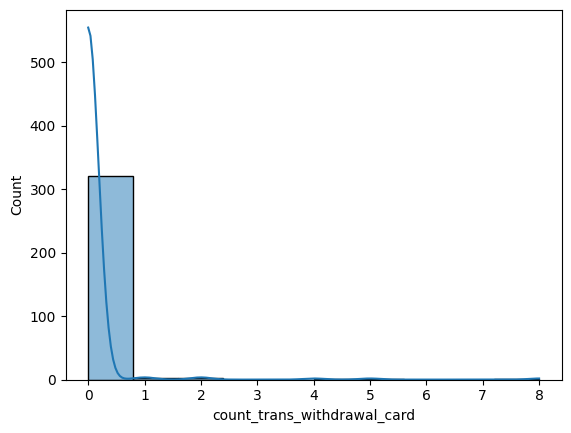

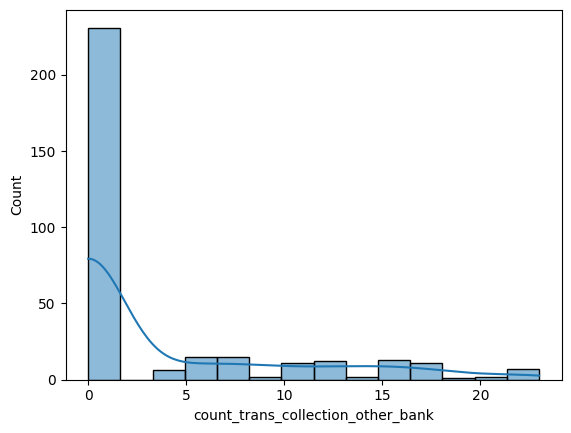

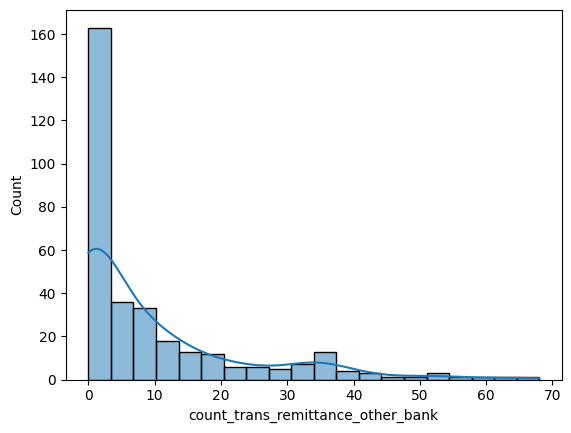

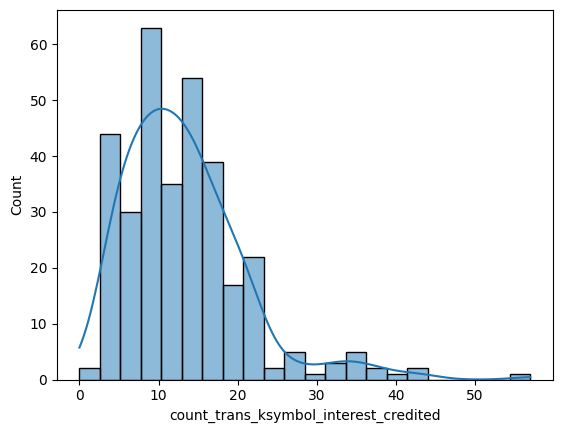

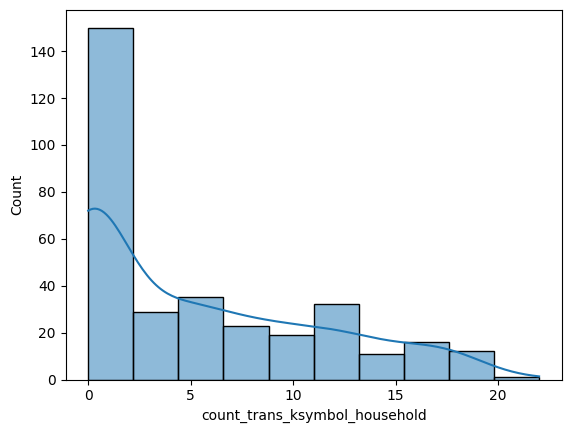

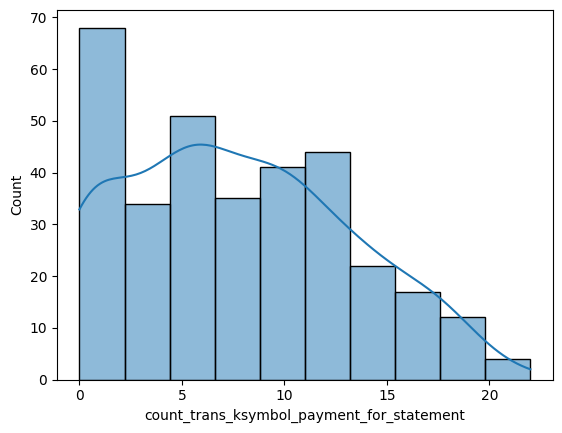

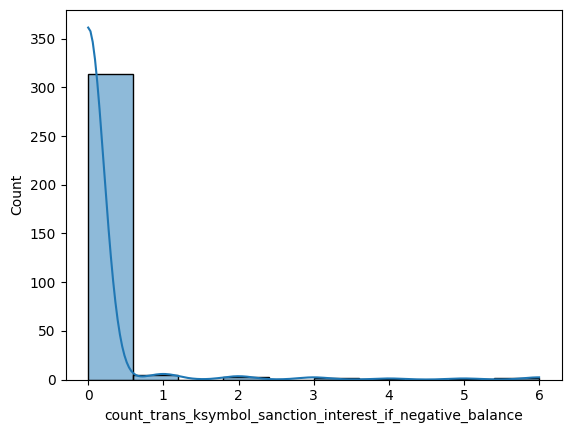

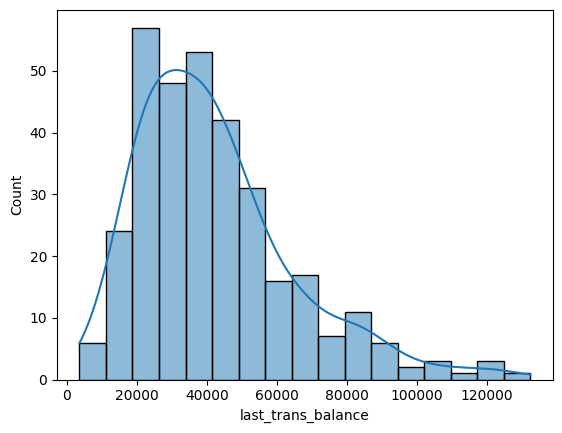

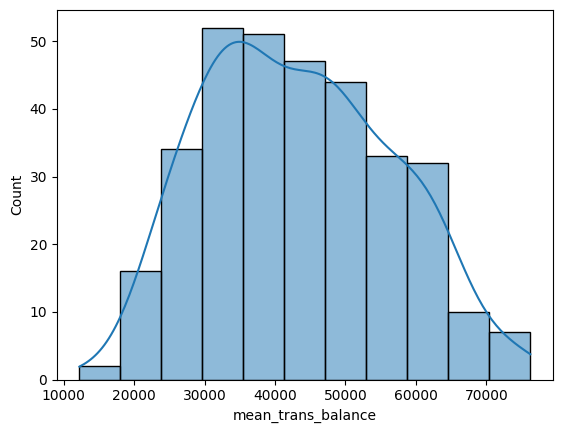

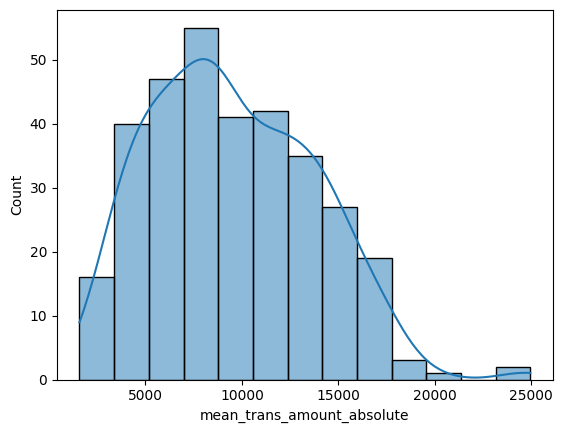

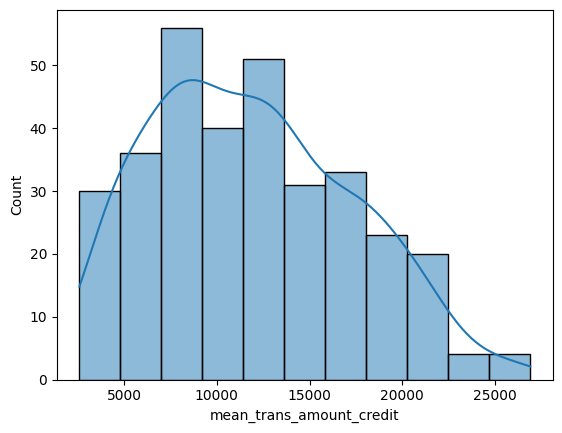

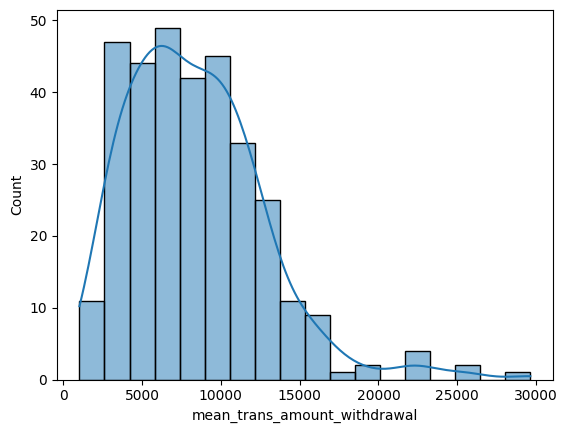

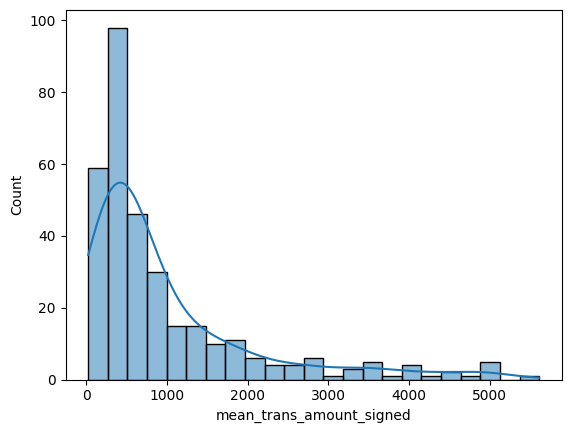

In [645]:
trans_cols = ['count_trans_credits',
              'count_trans_withdrawals',
              'count_trans_credit_cash',
              'count_trans_withdrawal_cash',
              'count_trans_withdrawal_card',
              'count_trans_collection_other_bank',
              'count_trans_remittance_other_bank',
              'count_trans_ksymbol_interest_credited',
              'count_trans_ksymbol_household',
              'count_trans_ksymbol_payment_for_statement',
              'count_trans_ksymbol_sanction_interest_if_negative_balance',
              'last_trans_balance',
              'mean_trans_balance',
              'mean_trans_amount_absolute',
              'mean_trans_amount_credit',
              'mean_trans_amount_withdrawal',
              'mean_trans_amount_signed']

show_hist(trans_cols)


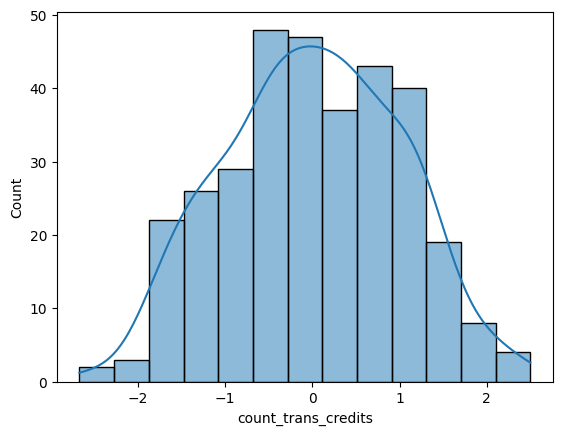

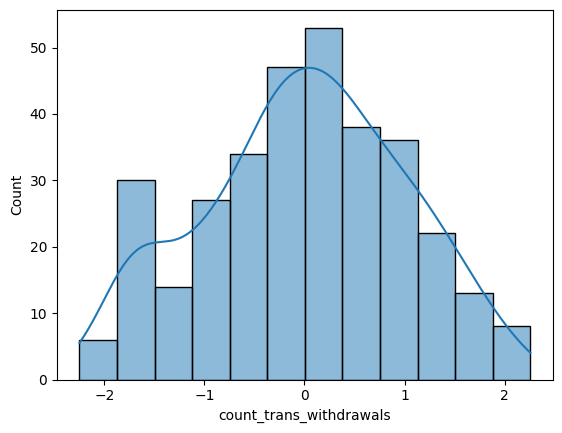

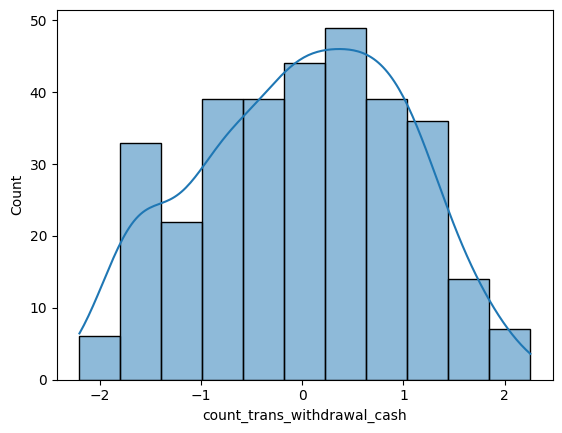

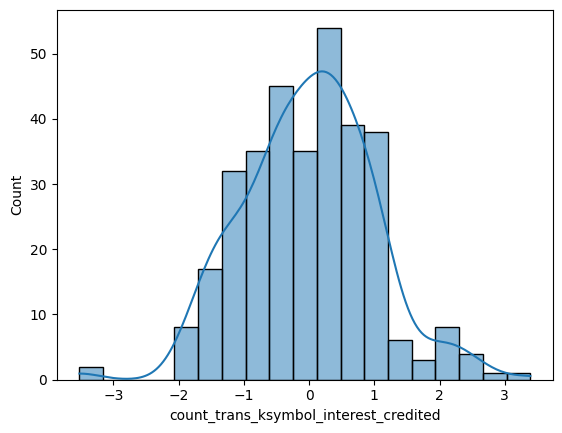

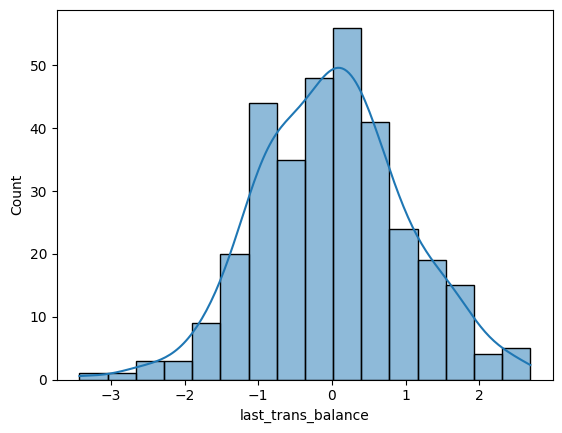

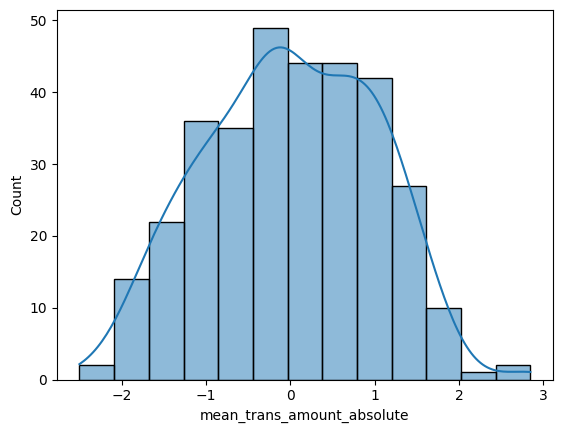

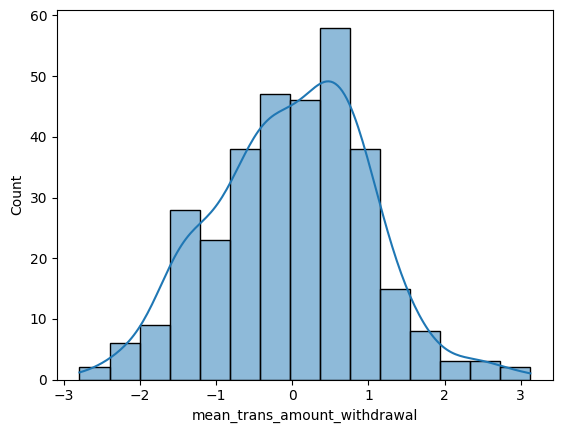

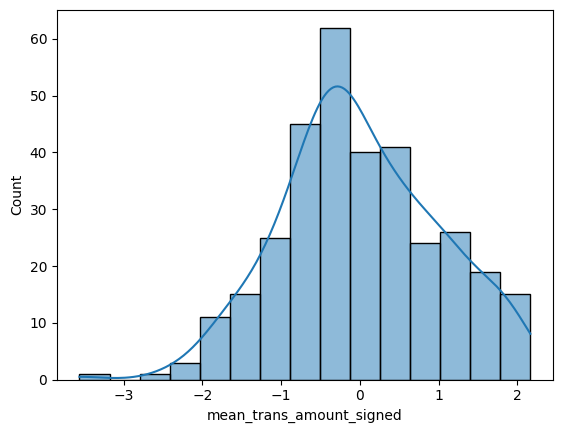

In [646]:
log_cols = ['count_trans_credits',
            'count_trans_withdrawals',
            'count_trans_withdrawal_cash',
            'count_trans_ksymbol_interest_credited',
            'last_trans_balance',
            'mean_trans_amount_absolute',
            'mean_trans_amount_withdrawal',
            'mean_trans_amount_signed']

transform(log_cols, PowerTransformer())

show_hist(log_cols)

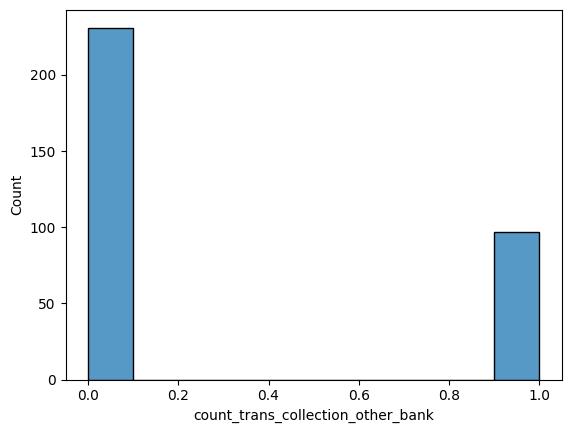

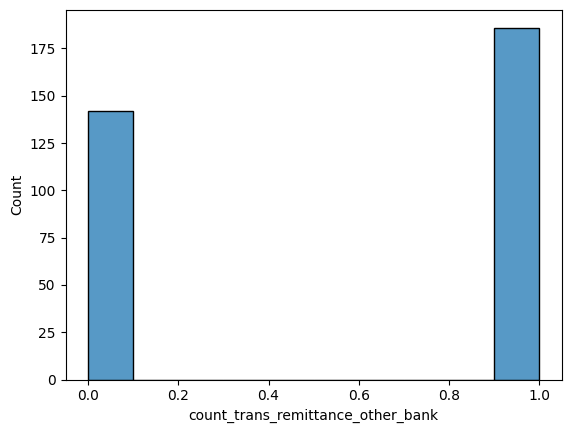

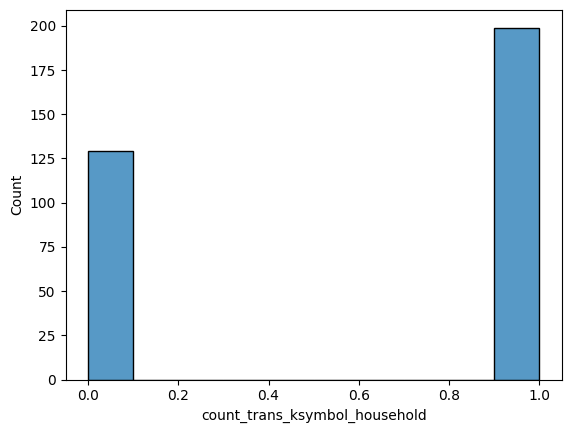

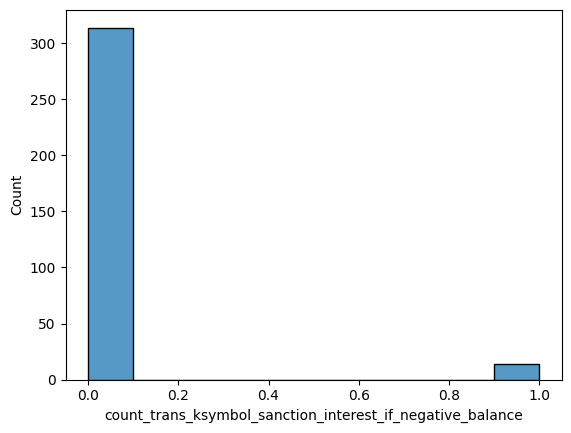

In [647]:
bin_cols = ['count_trans_collection_other_bank',
            'count_trans_remittance_other_bank',
            'count_trans_ksymbol_household',
            'count_trans_ksymbol_sanction_interest_if_negative_balance']

transform(bin_cols, Binarizer())

show_hist(bin_cols, trend=False)


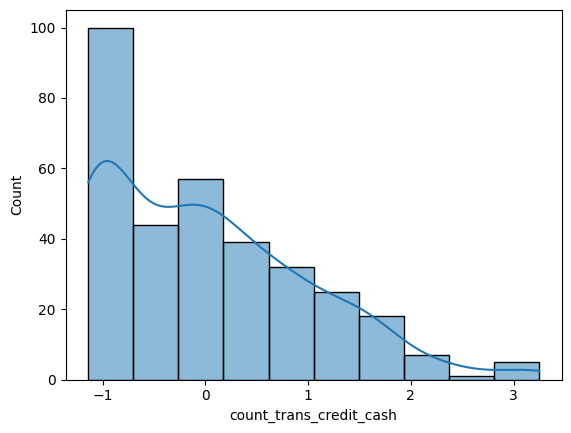

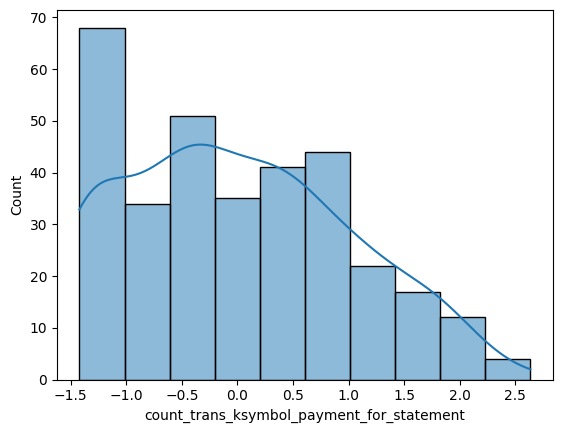

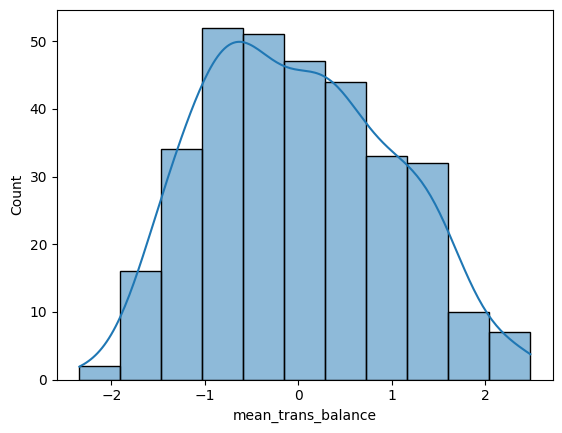

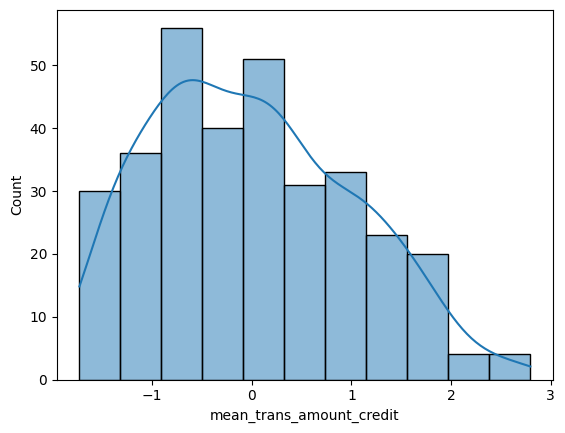

In [648]:
norm_cols = [col for col in trans_cols if col not in log_cols + bin_cols and col != 'count_trans_withdrawal_card']

transform(norm_cols, StandardScaler())

show_hist(norm_cols)

In [649]:
dev.to_csv('output/loan_dev_transformed.csv', index=False)
comp.to_csv('output/loan_comp_transformed.csv', index=False)
all.to_csv('output/loan_transformed.csv', index=False)